# NAME : ARYAN ARORA
##  CODECLAUSE DATA SCIENCE INTERN 
# TASK 1 : FRAUD DETECTION
## CREDIT CARD FRAUD DETECTION

DATASET LINK : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

Here , I have done Credit Card Fraud Detection. To identify purchase attempts that are fraudulent or non-fraudulent. Also, I have used two machine learning models i.e Logistic Regression and K-Means(Supervised and Unsupervised) to predict the fraudulents and also compared both the models based on the accuracy.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn import linear_model 
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score
from sklearn.metrics import matthews_corrcoef


Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv('D:/codeclause/dataset/creditcard.csv' )
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# ANALYZING DATA 

In [3]:
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
fraud = df.loc[df['Class'] == 1]
normal = df.loc[df['Class'] == 0]

In [10]:
outlierfraction = len(fraud)/float(len(normal))
print(outlierfraction)

0.0017304750013189597


In [11]:

fraud.count()

Time      492
V1        492
V2        492
V3        492
V4        492
V5        492
V6        492
V7        492
V8        492
V9        492
V10       492
V11       492
V12       492
V13       492
V14       492
V15       492
V16       492
V17       492
V18       492
V19       492
V20       492
V21       492
V22       492
V23       492
V24       492
V25       492
V26       492
V27       492
V28       492
Amount    492
Class     492
dtype: int64

In [14]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
len(normal)

284315

In [15]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [16]:
df.corr

<bound method DataFrame.corr of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

# DATA VISUALISATION

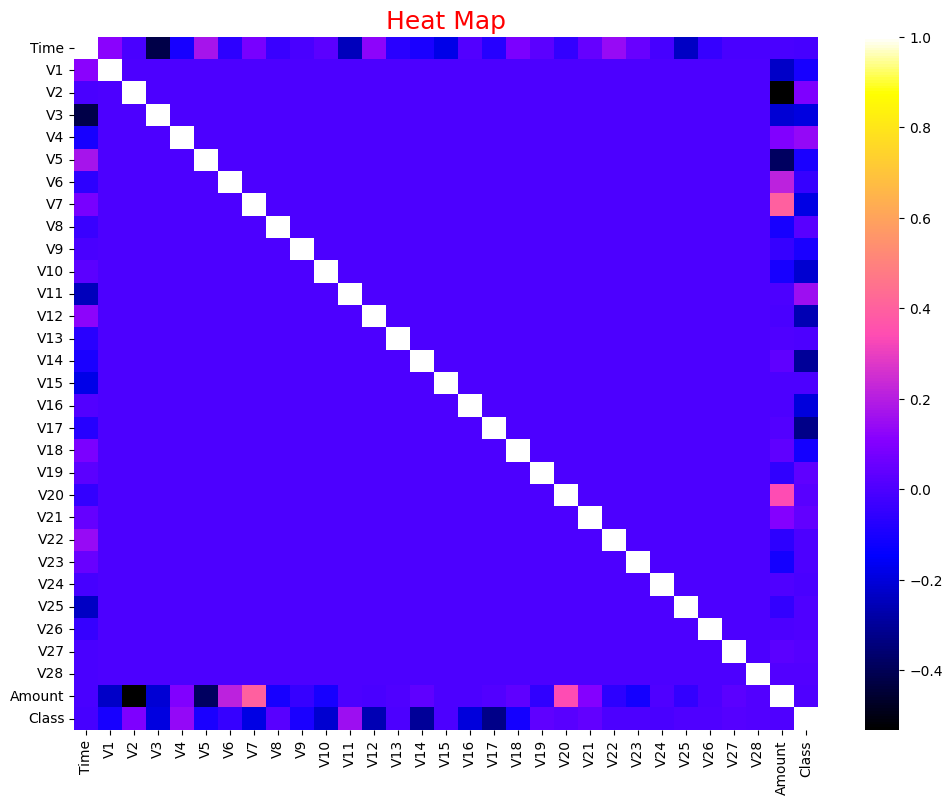

In [17]:
#heatmap describing df.corr()
cmt = df.corr()
fig = plt.figure(figsize = (12,9))
f = sns.heatmap(cmt , cmap = 'gnuplot2')
f.set_title("Heat Map" , size = 18 , color = 'Red')
plt.show() 

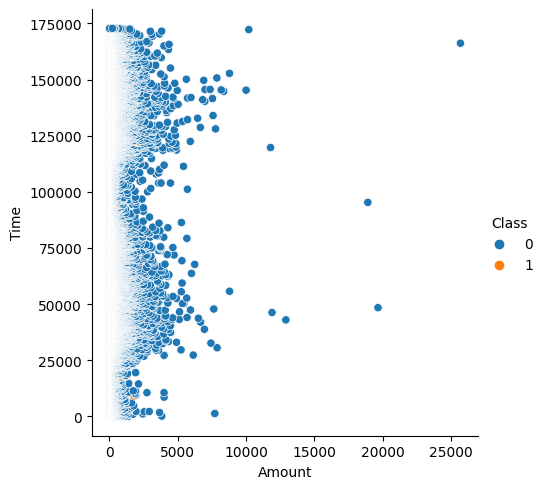

In [19]:
sns.relplot(x = 'Amount' , y = 'Time' , hue = 'Class' , data = df , cmap='copper' )

# TRAINING MODEL

In [20]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X , y , test_size = 0.25)

In [22]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
280875,169805.0,-0.638537,-0.075870,-2.935812,0.026009,-0.220243,-0.331480,3.079806,-0.152521,-0.938838,...,0.993049,0.906202,1.932186,1.163089,0.780832,-0.823587,-0.473588,0.290965,0.374391,518.90
167162,118521.0,1.802074,-1.004810,-0.962302,-0.996285,-0.395946,0.077203,-0.509283,0.072543,1.190993,...,0.186372,-0.086818,-0.492286,0.234395,0.117567,-0.607110,0.304458,-0.071388,-0.031515,139.20
276963,167385.0,-1.099527,1.808429,-1.149793,-1.895260,1.923387,-0.659752,2.281359,-1.005249,1.331450,...,1.031353,-0.201841,0.823586,-0.400636,0.099440,-0.084602,-0.064514,-0.096565,-0.779639,0.92
81411,58920.0,1.127576,-0.158346,0.799974,0.973867,-0.316899,0.817222,-0.584883,0.254366,0.579901,...,0.037075,-0.057209,-0.023083,-0.201357,-0.815148,0.556546,-0.360136,0.066399,0.023873,43.00
75496,56093.0,0.815105,-1.267547,0.885611,0.641360,-1.291934,0.795654,-0.904562,0.353164,-0.504310,...,-0.188632,-0.215189,-0.515759,-0.106264,-0.380365,0.106758,-0.381986,0.060184,0.060070,212.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187146,127408.0,0.062473,1.070131,-1.141744,-0.493541,0.586737,-1.020571,0.485060,0.291219,-0.172819,...,-0.343881,0.310158,0.775252,-0.002534,0.601480,-0.724762,0.487668,-0.054737,0.053617,1.50
82867,59586.0,-1.293429,0.657943,1.607503,0.959801,0.383808,-0.797121,0.894759,-0.280812,-0.764320,...,-0.118089,0.051758,0.360769,0.049603,0.420268,0.632806,-0.200425,-0.111644,0.082655,38.54
199489,132990.0,2.169265,-1.647136,-0.843639,-1.587318,-1.451742,-0.473141,-1.263705,-0.045763,-1.204237,...,-0.377475,-0.108330,0.035387,0.170486,-0.377322,-0.287925,-0.179857,0.002166,-0.053246,64.00
220717,142277.0,-2.447503,-2.724415,-2.591080,-1.550442,-4.772576,3.875994,4.537768,-0.300502,-2.778187,...,-1.055425,-0.413445,0.085121,0.594603,-1.597739,-0.398440,0.029202,0.511691,-0.090416,1276.00


In [23]:
#array to store the accuracy_score values of both models
scores = []

# COMPARING TWO MODELS

In [24]:
#logistic regression model
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [25]:
y_pred = np.array(lr.predict(X_test))
y = np.array(y_test)

In [26]:
print(accuracy_score(y , y_pred))
scores.append(accuracy_score(y , y_pred)*100)

0.9989326142524086


In [27]:
print(recall_score(y_test , y_pred))

0.5811965811965812


In [28]:
print(confusion_matrix(y , y_pred))

[[71058    27]
 [   49    68]]


In [29]:
print("Classification Report : ")
print(classification_report(y , y_pred))

Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71085
           1       0.72      0.58      0.64       117

    accuracy                           1.00     71202
   macro avg       0.86      0.79      0.82     71202
weighted avg       1.00      1.00      1.00     71202



In [30]:
n_outliers = len(fraud)
n_errors = (y_pred != y_test).sum()
print("The model used is Logistic Regression")
acc = accuracy_score(y_test, y_pred)
print("The accuracy is {}".format(acc))
prec = precision_score(y_test, y_pred)
print("The precision is {}".format(prec))
rec = recall_score(y_test, y_pred)
print("The recall is {}".format(rec))
f1 = f1_score(y_test, y_pred)
print("The F1-Score is {}".format(f1))
MCC = matthews_corrcoef(y_test, y_pred)
print("The Matthews correlation coefficient is {}".format(MCC))
     

The model used is Logistic Regression
The accuracy is 0.9989326142524086
The precision is 0.7157894736842105
The recall is 0.5811965811965812
The F1-Score is 0.6415094339622641
The Matthews correlation coefficient is 0.6444705397710121


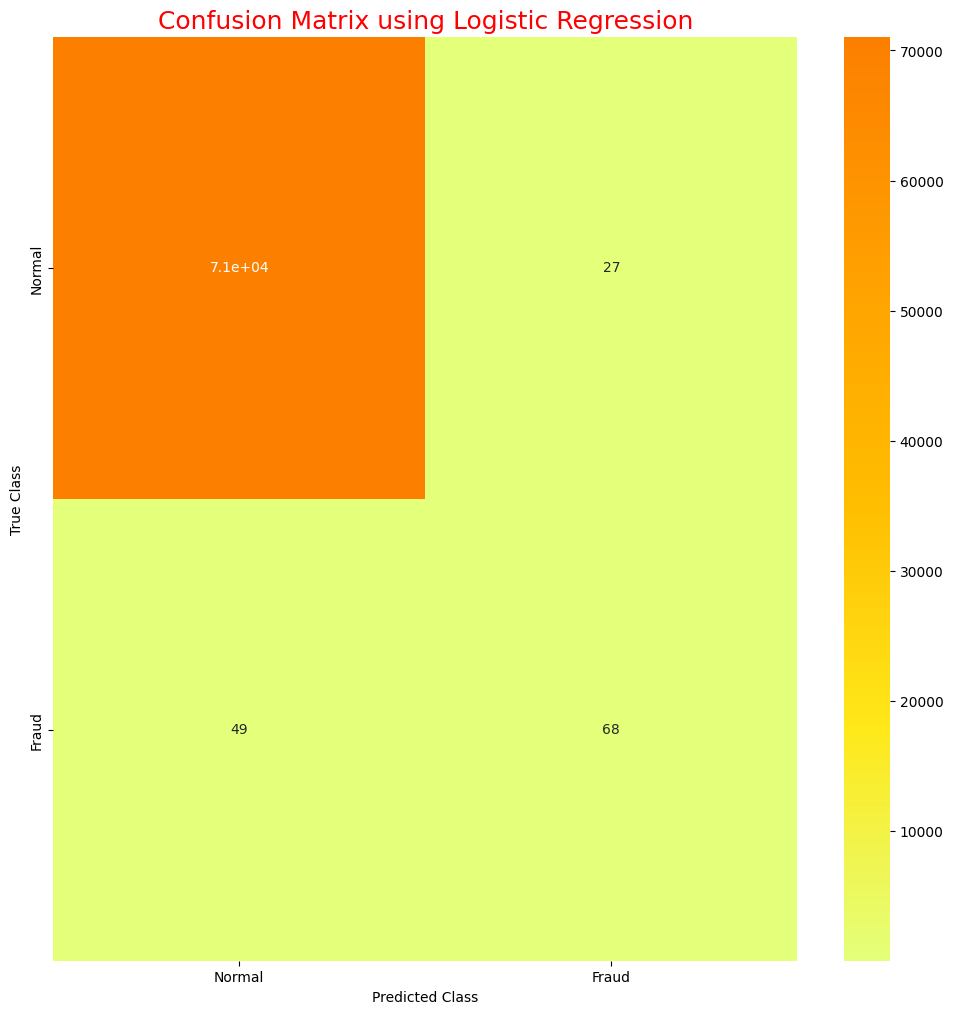

In [31]:
#confusion matrix using logistic regression
LABELS = ['Normal','Fraud']
conf_matrix = confusion_matrix(y_test , y_pred)
plt.figure(figsize = (12,12))
f = sns.heatmap(conf_matrix , xticklabels = LABELS , yticklabels = LABELS , annot=True ,cmap = 'Wistia')
f.set_title("Confusion Matrix using Logistic Regression" , color = "Red" , size = 18)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [32]:
#K-Means model
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train , y_train)

KMeans(n_clusters=2)

In [33]:
y_pred = np.array(kmeans.predict(X_test))
y = np.array(y_test)
     

In [34]:
print(accuracy_score(y , y_pred))
scores.append(accuracy_score(y , y_pred)*100)

0.4625431869891295


In [35]:
print(recall_score(y_test , y_pred))

0.6410256410256411


In [36]:
print(confusion_matrix(y , y_pred))

[[32859 38226]
 [   42    75]]


In [37]:
print("Classification Report : ")
print(classification_report(y , y_pred))

Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.46      0.63     71085
           1       0.00      0.64      0.00       117

    accuracy                           0.46     71202
   macro avg       0.50      0.55      0.32     71202
weighted avg       1.00      0.46      0.63     71202



In [38]:
n_outliers = len(fraud)
n_errors = (y_pred != y_test).sum()
print("The model used is K-Means")
acc = accuracy_score(y_test, y_pred)
print("The accuracy is {}".format(acc))
prec = precision_score(y_test, y_pred)
print("The precision is {}".format(prec))
rec = recall_score(y_test, y_pred)
print("The recall is {}".format(rec))
f1 = f1_score(y_test, y_pred)
print("The F1-Score is {}".format(f1))
MCC = matthews_corrcoef(y_test, y_pred)
print("The Matthews correlation coefficient is {}".format(MCC))

The model used is K-Means
The accuracy is 0.4625431869891295
The precision is 0.0019581734158377064
The recall is 0.6410256410256411
The F1-Score is 0.003904419803217242
The Matthews correlation coefficient is 0.008390112190685367


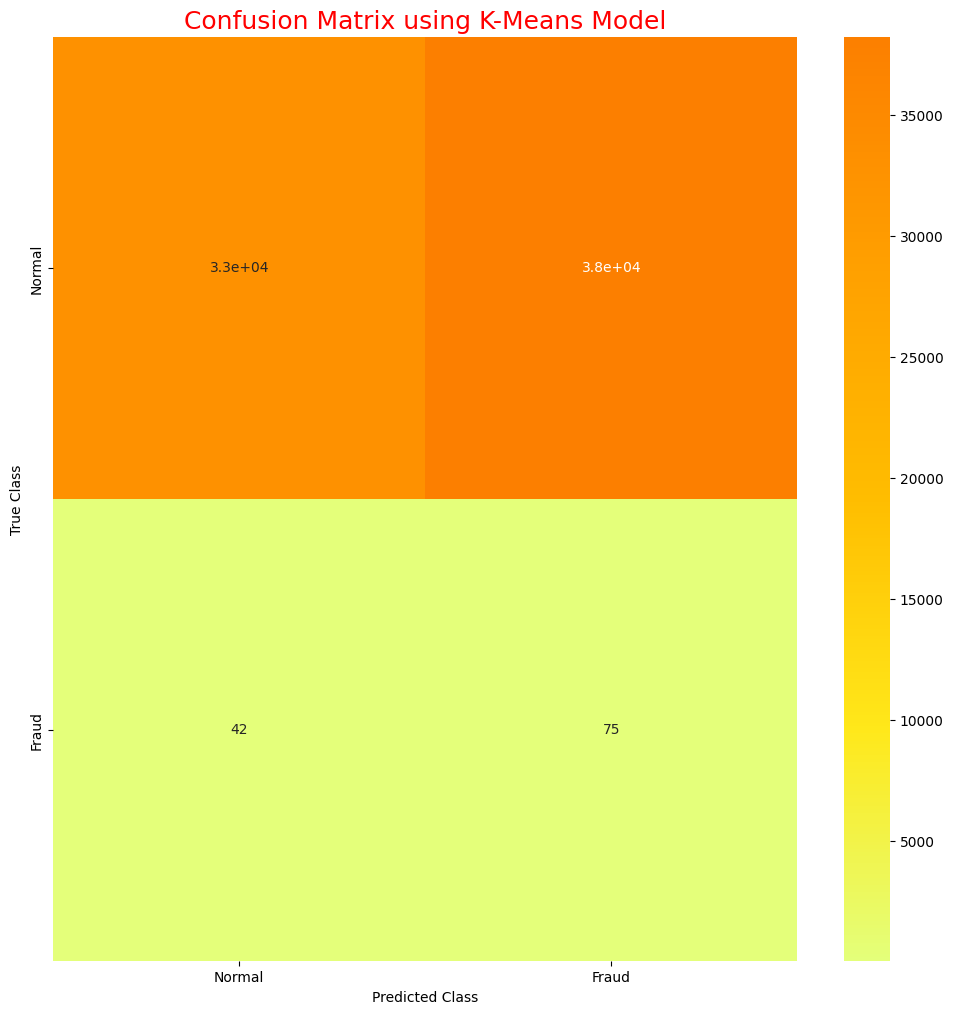

In [39]:
#confusion matrix using K-Means model
LABELS = ['Normal','Fraud']
conf_matrix = confusion_matrix(y_test , y_pred)
plt.figure(figsize = (12,12))
f = sns.heatmap(conf_matrix , xticklabels = LABELS , yticklabels = LABELS , annot=True ,cmap = 'Wistia')
f.set_title("Confusion Matrix using K-Means Model" , color = "Red" , size = 18)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [40]:
#models for comparision
results  = pd.DataFrame({
    'Models' : ['Logistic Regression' , 'K-Means'] , 'Accuracy' : scores})
results = results.sort_values(by = 'Accuracy' , ascending = False)
print(results)

                Models   Accuracy
0  Logistic Regression  99.893261
1              K-Means  46.254319


# CONCLUSION :


 As per the accuracy , Logistic Regression model is better than K-Means model for this dataset. 